# Padrões frequentes e regras de associação
[Exemplo extraído](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

In [0]:
! pip uninstall mlxtend
! pip install git+https://github.com/rasbt/mlxtend.git


Uninstalling mlxtend-0.14.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/mlxtend-0.14.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/mlxtend/*
Proceed (y/n)? y
  Successfully uninstalled mlxtend-0.14.0
  Cloning https://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-t0cnh60e
  Running command git clone -q https://github.com/rasbt/mlxtend.git /tmp/pip-req-build-t0cnh60e
  Created wheel for mlxtend: filename=mlxtend-0.18.0.dev0-py2.py3-none-any.whl size=1580752 sha256=16d6ac98d2d06601637fd8e91122c6a174418264a721eed8989909610bf4b2b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ulmc4ey/wheels/ea/3f/f8/8facd558a8038cf0ea77a28cd1ede5de977b9d9e1e9367f9de
Successfully built mlxtend


In [0]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori


dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

df


,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [0]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"


In [0]:
from mlxtend.frequent_patterns import fpmax
max_itemsets = fpmax(df, min_support=0.6, use_colnames=True)

max_itemsets

,support,itemsets
0,0.6,"(Kidney Beans, Milk)"
1,0.6,"(Onion, Kidney Beans, Eggs)"
2,0.6,"(Kidney Beans, Yogurt)"


## Regras de associação


In [0]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


In [0]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf
5,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6


In [0]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,1
1,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,2
3,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2
4,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf,1
5,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6,1


In [0]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
2,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,2


In [0]:
rules[rules['antecedents'] == {'Eggs', 'Kidney Beans'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
3,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2


# Fronteira de pareto
https://pythonhealthcare.org/tag/pareto-front/


In [0]:
import numpy as np
import matplotlib.pyplot as plt


def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

[[0.8  1.  ]
 [1.   1.  ]
 [1.   1.25]
 [0.75 1.25]
 [0.6  1.  ]
 [1.   1.  ]
 [1.   1.  ]
 [0.6  1.  ]
 [0.6  1.  ]
 [1.   1.  ]
 [1.   1.25]
 [1.   1.  ]
 [0.75 1.25]
 [1.   1.25]
 [0.6  1.  ]
 [0.75 1.25]]


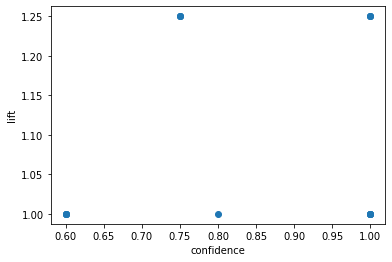

In [0]:
rules = association_rules(frequent_itemsets)


rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.1)

scores = rules[['confidence', 'lift']].values
print(scores)

x = rules['confidence'].values
y = rules['lift'].values

#print(x)
#print(y)
plt.scatter(x, y)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.show()

In [0]:
pareto = identify_pareto(scores)
print ('Pareto front index vales')
print ('Points on Pareto front: \n',pareto)

pareto_front = scores[pareto]
print ('\nPareto front scores')
print (pareto_front)

Pareto front index vales
Points on Pareto front: 
 [ 2 10 13]

Pareto front scores
[[1.   1.25]
 [1.   1.25]
 [1.   1.25]]


In [0]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df.sort_values(0, inplace=True)
pareto_front = pareto_front_df.values

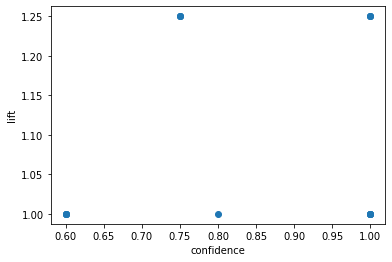

In [0]:
x_all = scores[:, 0]
y_all = scores[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]

plt.scatter(x_all, y_all)
plt.plot(x_pareto, y_pareto, color='r')
plt.xlabel('confidence')
plt.ylabel('lift')
plt.show()